#**This notebook will simulate a deployed end-user environment where new data will be fed into the pre-trained models to give a prediction**

**Let's first import some relevant packages**

In [0]:
# Import needed packages
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import types
import pandas as pd
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.externals import joblib

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Now let's retrieve the pre-fit scalers that we saved from the feature engineering stage**

In [0]:
# Retrieve pre-fit scalers
link = 'https://drive.google.com/file/d/1bA6E0Vzuc5arJIgs5aeIGoL1KWAXB149/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz')  
scaler_dayS = joblib.load('xyz')

link = 'https://drive.google.com/file/d/1g_Id4UHRNdfxIa5JOJ3lAoLwLeiop8Zs/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz')  
scaler_dayC = joblib.load('xyz')

link = 'https://drive.google.com/file/d/1YE58HqrbpaPb0AH1iD1pFt83nGoeWYrT/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz')  
scaler_timeS = joblib.load('xyz')

link = 'https://drive.google.com/file/d/1OBmAdJxougpepX3PtGv7E6F-T_hyblDq/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz')   
scaler_timeC = joblib.load('xyz')

link = 'https://drive.google.com/file/d/1aItrqO0w4l-e4ihrkDY55HVSR2oKoOnL/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz')  
scaler_dist = joblib.load('xyz')

**Retrieve the pre-fit IPCA transformer**

In [0]:
from sklearn.decomposition import IncrementalPCA

link = 'https://drive.google.com/file/d/1BMOLQd25dVuf8xcfXkYbvlrHFKOhIiQm/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
ipca = joblib.load('xyz.pkl')

**Retrieve the "pre-trained" Dummy Classifier**

---

In [0]:
from sklearn.dummy import DummyClassifier

link = 'https://drive.google.com/file/d/1C6PBNfZr0JpHkhGBqTXftpMwDHWA3-Dm/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
DC = joblib.load('xyz.pkl')

**Retrieve the pre-trained Logistic Classifier**

---

In [0]:
# Retrieve pre-trained LR model

from sklearn.linear_model import LogisticRegression

link = 'https://drive.google.com/file/d/1YyylNFY0dN9gy4Yx6tiHhKpSfHAq1dKP/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
LR = joblib.load('xyz.pkl')

**Retrieve the pre-trained Decision Tree Classifier**

---

In [0]:
link = 'https://drive.google.com/file/d/15bi3dSCZHJwLgjPnBe2tDyWvNcORC99i/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
RFC1 = joblib.load('xyz.pkl')

**Retrieve the pre-trained Deep Feedforward Neural Networks**

---

In [0]:
import keras as keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras import initializers

link = 'https://drive.google.com/file/d/1Dh2yY4Taj8s0t4H3yOxfiJjzfpEucqNW/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.h5')  
model1 = keras.models.load_model('xyz.h5')

link = 'https://drive.google.com/file/d/1uxyrSjk_gOY270GClydM2n4ARWdTVweJ/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.h5')  
model2 = keras.models.load_model('xyz.h5')

link = 'https://drive.google.com/file/d/1LQoddlgC9OJu98sCzlSXRHTAAPg-UOJb/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.h5')  
model_ov = keras.models.load_model('xyz.h5')

link = 'https://drive.google.com/file/d/1t1dKkLnKyIllaBo0z6plxWRK9wPVZP-S/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.h5')  
model_un = keras.models.load_model('xyz.h5')

**Retrieve the pre-trained Random Forest Classifiers**

---

In [0]:
from sklearn.ensemble import RandomForestClassifier

link = 'https://drive.google.com/file/d/1UN2vw5n7G-Hmt5wj1Fu-2ELWnIb9RYLy/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
RFC1 = joblib.load('xyz.pkl')

link = 'https://drive.google.com/file/d/1ysmlNP7tYvwDHgyXRMMn1KVqASZo5uzL/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
RFC2 = joblib.load('xyz.pkl')

link = 'https://drive.google.com/file/d/18BGkJS6UDSUOFyHxAko2G-kcO_o-gfBV/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')   
RFC3 = joblib.load('xyz.pkl')

link = 'https://drive.google.com/file/d/1pJ7OTsjfyxB_eItxwH5FfhWG78Cf89jV/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')    
RFC4 = joblib.load('xyz.pkl')

**Retrieve the pre-trained XGBoost Classifiers**

---

In [0]:
from xgboost import XGBClassifier

link = 'https://drive.google.com/file/d/1EPifHBRpetuPRvLceDcYA0kHIfMxhYwo/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')   
XGB1 = joblib.load('xyz.pkl')

link = 'https://drive.google.com/file/d/1UeGLaUJA5Pt3wxbAomAkytOgxDvmlpV4/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
XGB2 = joblib.load('xyz.pkl')

link = 'https://drive.google.com/file/d/1vpTRYunwU4ToK5uyF3MP0RRRUa35-uFx/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xyz.pkl')  
XGB3 = joblib.load('xyz.pkl')

**Now let's define a function that will process the data the same way the train data was**

In [0]:
def processdata(abc):
  
  # Let's remove the "gaps" in the departure time column by making minutes out of 100 rather than 60 and then 
  # rejoining to make a uniform time scale between 0 and 2399

  df1 = abc[["DAY_OF_WEEK","DEP_TIME","DISTANCE","OP_UNIQUE_CARRIER","ORIGIN_AIRPORT_SEQ_ID","DEST_AIRPORT_SEQ_ID","DEP_DEL15","ARR_DEL15"]]

  # Convert scheduled time into a uniform time scale between 0-2400
  df1["DEP_HOUR"]=np.floor(df1["DEP_TIME"]/100)
  df1["DEP_MINUTE100"]=(df1["DEP_TIME"]-df1["DEP_HOUR"]*100)*100/60
  df1["DEP_TIME_UNIFORM"]=df1["DEP_HOUR"]*100+df1["DEP_MINUTE100"]

  df1 = df1.drop(columns = {"DEP_HOUR","DEP_MINUTE100","DEP_TIME"})



  # Now we will convert cyclical categories into both sine and cosine waves to preserve the cyclical nature of these time data points and ensure 
  # no two times of day or days of week are treated the same by the model. These will both be fed into the model

  # Time of day 24 hour cycle
  df1[["DEP_TIME_UNIFORM_SINE"]]=np.sin(df1[["DEP_TIME_UNIFORM"]]/2400*2*np.pi)
  df1[["DEP_TIME_UNIFORM_COSINE"]]=np.cos(df1[["DEP_TIME_UNIFORM"]]/2400*2*np.pi)

  # Day of week 7 day cycle 
  df1[["DAY_OF_WEEK_SINE"]]=np.sin(df1[["DAY_OF_WEEK"]]/7*2*np.pi)
  df1[["DAY_OF_WEEK_COSINE"]]=np.cos(df1[["DAY_OF_WEEK"]]/7*2*np.pi)

  df1 = df1.reset_index()
  df1 = df1.drop(columns = {"DEP_TIME_UNIFORM","DAY_OF_WEEK","index"})




  # Now we will apply pre-fit scalers

  # Day of week 
  df1["DAY_OF_WEEK_SINE_MM"] = pd.DataFrame(scaler_dayS.transform(pd.DataFrame(df1["DAY_OF_WEEK_SINE"])),columns=["DAY_OF_WEEK_SINE"])
  df1["DAY_OF_WEEK_COSINE_MM"] = pd.DataFrame(scaler_dayC.transform(pd.DataFrame(df1["DAY_OF_WEEK_COSINE"])),columns=["DAY_OF_WEEK_COSINE"])

  # Time of day
  df1["DEP_TIME_UNIFORM_SINE_MM"] = pd.DataFrame(scaler_timeS.transform(pd.DataFrame(df1["DEP_TIME_UNIFORM_SINE"])),columns=["DEP_TIME_UNIFORM_SINE"])
  df1["DEP_TIME_UNIFORM_COSINE_MM"] = pd.DataFrame(scaler_timeC.transform(pd.DataFrame(df1["DEP_TIME_UNIFORM_COSINE"])),columns=["DEP_TIME_UNIFORM_COSINE"])

  # Flight Distance 
  df1["DISTANCE_MM"] = pd.DataFrame(scaler_dist.transform(pd.DataFrame(df1["DISTANCE"])),columns=["DISTANCE"])

  df1 = df1.drop(columns = {"DEP_TIME_UNIFORM_SINE","DEP_TIME_UNIFORM_COSINE","DAY_OF_WEEK_SINE","DAY_OF_WEEK_COSINE","DISTANCE"})




  # We will now one-hot encode the categorical data
  df1 = pd.get_dummies(df1, columns=["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT_SEQ_ID","DEST_AIRPORT_SEQ_ID"])
  df1 = df1.dropna()

  # set aside class labels as y
  y = df1["ARR_DEL15"]
  df1 = df1.drop(columns = {"ARR_DEL15"})
  
  # We will now retrieve the row headings for the features data
  link = 'https://drive.google.com/file/d/12L3tz73CXMzdkx3HwFaTJk6UHg0J1u-z/view?usp=sharing'
  fluff, id  = link.split('d/')
  id, fluff = id.split('/view')
  print (id) # Verify that you have everything after '='
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('x2---post feature_eng.csv')  
  featureheadings = pd.read_csv('x2---post feature_eng.csv')
  featureheadings = featureheadings.drop(columns=["Unnamed: 0"])
  featureheadings = featureheadings.head(0)
  featureheadings


  # We will now append the new unseen data onto the row headings template, and fill any NaNs that will have appeared on the categorical data with zeros
  x = featureheadings.append(df1)
  x = x.fillna(0)
  
  # Transform the new dataset with the IPCA transformer
  transformed_x = ipca.transform(x)
  return transformed_x, y

**Define a function to choose a model and make a prediction on the new data. In this case, the data we are testing has been seen and has a class label, so we can make sure the accuracy is roughly in line with what we observed during model train and test**

In [0]:
def predict(classifier,abc):
  
  # Make a prediction
  prediction = pd.DataFrame(classifier.predict(abc))
  prediction[prediction <= 0.5] = 0.
  prediction[prediction > 0.5] = 1.

  return prediction

****

**Let's give it a shot with a few different classifiers. Let's import a random 5% of the original dataset to simulate "unseen" data - this will let us test that the loaded models are working**

In [0]:
# Import data
link = 'https://drive.google.com/file/d/1i02U6vplm6aXWbQLNcZwGzt6oBEAoVpP/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('abcde.csv')  
df = pd.read_csv('abcde.csv')

# Create random 5% of data
msk = np.random.rand(len(df)) < 0.05
df = df[msk]

df.dropna()
print(df.shape)

display(df.head(10))

(59535, 23)


,Unnamed: 0,Year,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
53,53,2019,1,2,9E,20363,9E,N835AY,3327,10397,1039707,ATL,14108,1410803,PIA,1206.0,0.0,1200-1259,1246.0,0.0,0,0,565
93,93,2019,1,2,9E,20363,9E,N398CA,3363,10397,1039707,ATL,12945,1294503,LEX,1451.0,0.0,1400-1459,1601.0,0.0,0,0,304
139,139,2019,1,2,9E,20363,9E,N582CA,3402,13487,1348702,MSP,14524,1452401,RIC,1744.0,0.0,1700-1759,2104.0,0.0,0,0,970
151,151,2019,1,2,9E,20363,9E,N197PQ,3412,10397,1039707,ATL,10980,1098002,CHA,855.0,0.0,0900-0959,936.0,0.0,0,0,106
212,212,2019,1,2,9E,20363,9E,N912XJ,5425,10397,1039707,ATL,12323,1232305,ILM,2117.0,0.0,2100-2159,2230.0,0.0,0,0,377
242,242,2019,1,2,AA,19805,AA,N394AN,383,13303,1330303,MIA,14771,1477104,SFO,727.0,0.0,0700-0759,1026.0,0.0,0,0,2585
261,261,2019,1,2,AA,19805,AA,N207UW,407,11298,1129806,DFW,14107,1410702,PHX,1210.0,0.0,1200-1259,1340.0,0.0,0,0,868
296,296,2019,1,2,AA,19805,AA,N543UW,1872,14100,1410005,PHL,13930,1393007,ORD,552.0,0.0,0600-0659,725.0,0.0,0,0,678
301,301,2019,1,2,AA,19805,AA,N829AW,1877,11057,1105703,CLT,10423,1042302,AUS,2007.0,0.0,2000-2059,2157.0,0.0,0,0,1032
314,314,2019,1,2,AA,19805,AA,N796AN,7,11298,1129806,DFW,13830,1383002,OGG,911.0,0.0,0900-0959,1317.0,0.0,0,0,3711


**Use the function to process the imported data**

In [0]:
x, y = processdata(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

12L3tz73CXMzdkx3HwFaTJk6UHg0J1u-z


**Let's try and make a prediction with the pre-trained XGB model**

In [0]:
prediction = predict(XGB1,x)
prediction.head(10)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


**Now let's try one of the neural networks**

In [0]:
prediction = predict(model2,x)
prediction.head(10)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


**Let's just make sure that the prediction is valid**

Acc:  0.9224377682403434


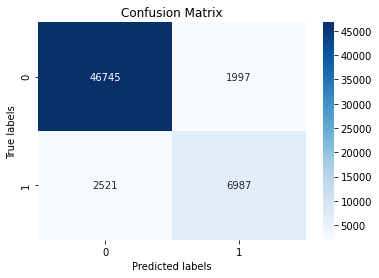

In [0]:
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import plot_confusion_matrix
  from sklearn.metrics import f1_score
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report
  import seaborn as sns
  import matplotlib.pyplot as plt 

  # Print accuracy and confusion matrix, as this simulated "unseen" dataset isn't actually unseen.
  print("Acc: " , accuracy_score(y, prediction))

  cm = confusion_matrix(y, prediction)

  tn = cm.ravel()[0]
  fp = cm.ravel()[1]
  fn = cm.ravel()[2]
  tp = cm.ravel()[3]

  fig, (ax) = plt.subplots(1, 1)
  sns.heatmap(cm, annot=True, fmt = ".0f", ax = ax,cmap="Blues"); #annot=True to annotate cells
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

**As expected, the accuracy is similar to the train and test accuracy scores. This means our pre-processing steps from the loaded transformers is working fine**